In [114]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

In [2]:
x=0
x_t={}
x_t[0]=0.0
y_t={}
for i in range(101):
    x_t[i+1]=x_t[i]+np.random.normal(0,1,1)[0]
    y_t[i+1]=x_t[i+1]+np.random.normal(0,0.5,1)[0]

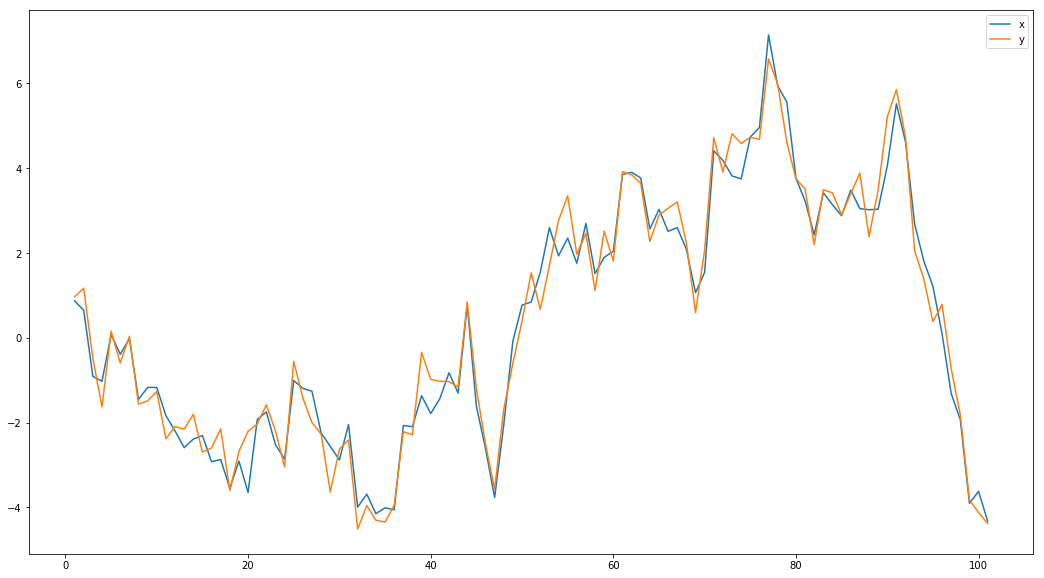

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plt.plot(pd.DataFrame(x_t,index=x_t.keys())[0:1].T[1:],label='x')
plt.plot(pd.DataFrame(y_t,index=y_t.keys())[0:1].T,label='y')
plt.legend()
plt.show()

In [4]:
sigma=1
tao=0.5
m={}
C={}
m[0]=0.0
C[0]=10.0
Q={}
A={}
R={}
for i in range(101):
    R[i+1]=C[i]+tao
    Q[i+1]=R[i+1]+sigma
    A[i+1]=R[i+1]/Q[i+1]
    C[i+1]=A[i+1]*sigma
    m[i+1]=(1-A[i+1])*m[i]+A[i+1]*y_t[i+1]

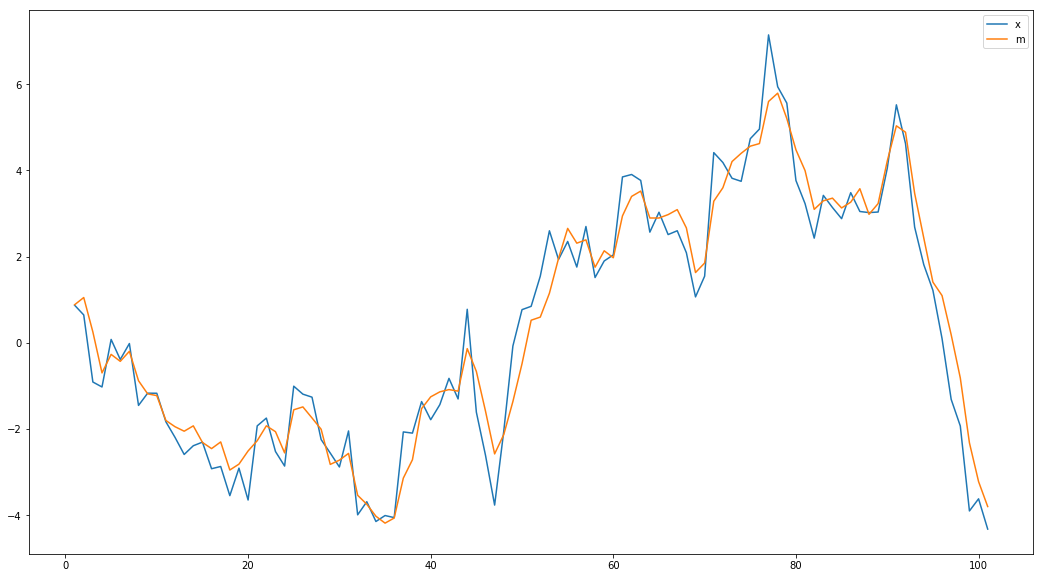

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plt.plot(pd.DataFrame(x_t,index=x_t.keys())[0:1].T[1:],label='x')
plt.plot(pd.DataFrame(m,index=m.keys())[0:1].T[1:],label='m')
plt.legend()
plt.show()

In [6]:
B={}
m_back={}
C_back={}
C_back[100]=C[100]
m_back[100]=m[100]
for i in range(100)[::-1]:
    B[i]=C[i+1]/(C[i+1]+tao)
    m_back[i]=(1-B[i])*m[i]+B[i]*m_back[i+1]
    C_back[i]=(1-B[i])*C[i]+B[i]**2*C_back[i+1]

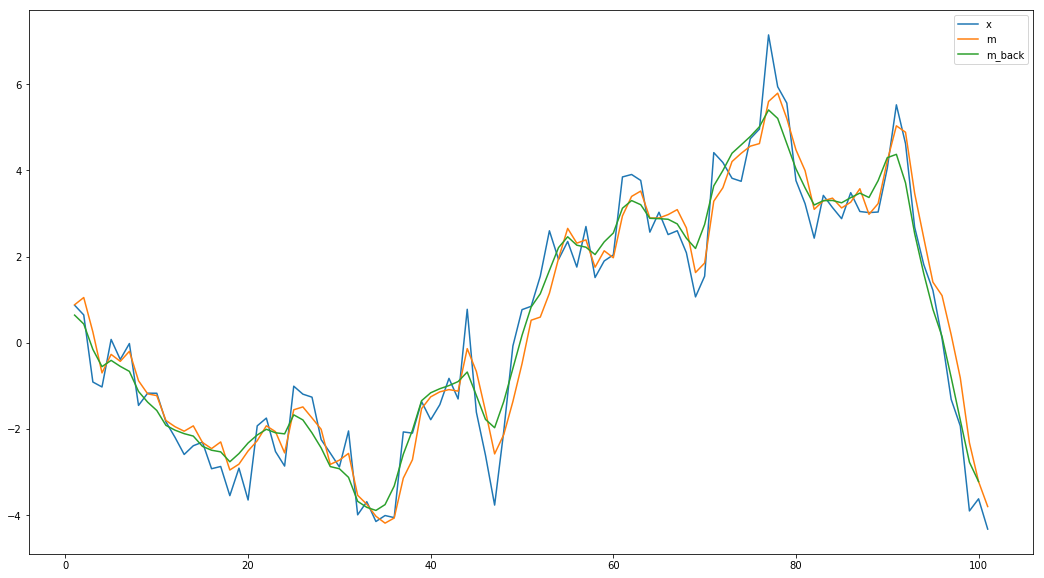

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plt.plot(pd.DataFrame(x_t,index=x_t.keys())[0:1].T[1:],label='x')
plt.plot(pd.DataFrame(m,index=m.keys())[0:1].T[1:],label='m')
plt.plot(pd.DataFrame(m_back,index=m_back.keys())[0:1].T[1:],label='m_back')
plt.legend()
plt.show()

In [8]:
n=100
w1=0.01
w2=0.001
v=0.5
x={}
x[0]={}
x[0][1]=0
x[0][2]=0
y={}
for i in range(n):
    x[i+1]={}
    x[i+1][2]=x[i][2]+np.random.normal(0,np.sqrt(0.001),1)[0]
    x[i+1][1]=x[i][1]+x[i+1][2]+np.random.normal(0,np.sqrt(0.01),1)[0]
    y[i+1]=x[i+1][1]+np.random.normal(0,np.sqrt(0.5),1)[0]

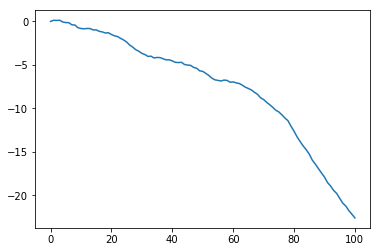

In [9]:
plt.plot(pd.DataFrame(x).T[1])
plt.show()

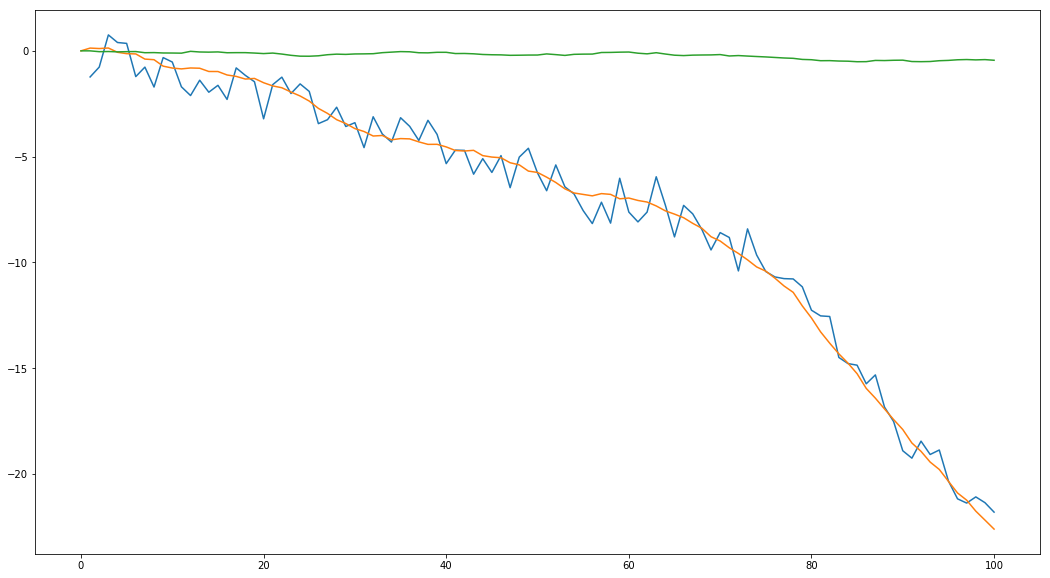

In [10]:
plt.figure(figsize=(18,10))
plt.plot(pd.DataFrame(y,index=y.keys())[0:1].T,label='y')
plt.plot(pd.DataFrame(x).T[1],label='x1')
plt.plot(pd.DataFrame(x).T[2],label='x2')
plt.show()

In [11]:
n=100
w1=0.01
w2=0.001
v=0.5
X=np.zeros([100,2])
Y=np.zeros([100,1])
for i in range(1,n):
    X[i][1]=X[i-1][1]+np.random.normal(0,np.sqrt(0.001),1)[0]
    X[i][0]=X[i-1][0]+X[i][1]+np.random.normal(0,np.sqrt(0.01),1)[0]
    Y[i]=X[i][0]+np.random.normal(0,np.sqrt(0.5),1)[0]

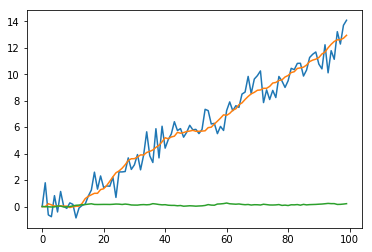

In [12]:
plt.plot(Y)
plt.plot(X)
plt.show()

In [13]:
F=np.matrix([[1],[0]])
G=np.matrix([[1,1],[0,1]])
a1=np.matrix([[0],[0]])
r1=np.matrix(np.eye(2))
W=np.matrix([[w1,0],[0,w2]])

In [14]:
a={}
r={}
m={}
c={}
a[0]=a1
r[0]=r1
f=F.T*a1
Q=F.T*r1*F+v
A=(r1*F)/Q
m[0]=a[0]+A*(Y[0]-f)
c[0]=r[0]-A*A.T*Q.tolist()[0][0]
for i in range(1,n):
    a[i]=G*m[i-1]
    r[i]=G*c[i-1]*G.T+W
    f=F.T*a[i]
    Q=F.T*r[i]*F+v
    A=r[i]*F/Q
    e=Y[i]-f
    m[i]=a[i]+A*e
    c[i]=r[i]-A*A.T*Q.tolist()[0][0]

In [15]:
mm={}
cc={}
mm[99]=m[99]
cc[99]=c[99]
for i in range(0,n-1)[::-1]:
    B=c[i]*G.T*r[i+1]**(-1)
    mm[i]=m[i]+B*(mm[i+1]-a[i+1])
    cc[i]=c[i]-B*(r[i+1]-cc[i+1])*B.T

In [16]:
m_1=[]
m_2=[]
mm_1=[]
mm_2=[]
for i in range(n):
    mm_1.append(mm[i].tolist()[0][0])
    mm_2.append(mm[i].tolist()[1][0])
    m_1.append(m[i].tolist()[0][0])
    m_2.append(m[i].tolist()[1][0])

In [17]:
B

matrix([[ 0.96805702, -0.96708993],
        [ 0.00290127,  0.99610263]])

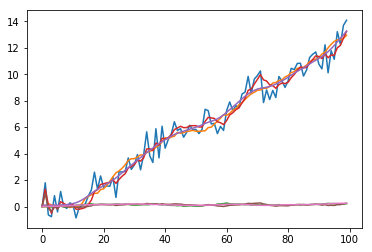

In [18]:
plt.plot(Y)
plt.plot(X)
plt.plot(m_1)
plt.plot(mm_1)
plt.plot(m_2)
plt.plot(mm_2)
plt.show()

In [19]:
M=100
ccc={}
mmm={}
xb={}
ccc[99]=c[99]
mmm[99]=m[99]
xb[99]=np.matrix(mmm[99].T.tolist()*100)+np.random.randn(100,2)*np.linalg.cholesky(c[99]).T
for i in range(n-1)[::-1]:
    ccc[i]=(G.T*W**(-1)*G+c[i]**(-1))**(-1)
    mmm[i]=(ccc[i]*G.T*W**(-1)*xb[i+1].T).T+np.matrix((ccc[i]*c[i]**(-1)*m[i]).T.tolist()*100)
    xb[i]=mmm[i]+np.random.randn(100,2)*np.linalg.cholesky(ccc[i]).T

In [20]:
xb_1=[]
xb_2=[]
for i in range(100):
    xb_1.append(np.mean(xb[i].T.tolist()[0]))
    xb_2.append(np.mean(xb[i].T.tolist()[1]))

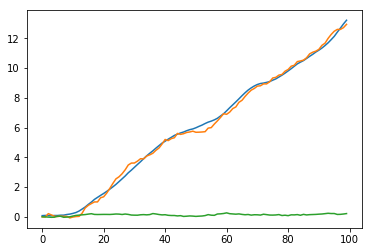

In [21]:
plt.plot(xb_1)
plt.plot(X)
plt.show()

In [315]:
n=500
h0=0.0
u=-0.00645
phi=0.99
tau2=0.15**2
tau=np.sqrt(tau2)

In [316]:
h=[]
h.append(0)
for i in range(1,n):
    h.append(np.random.normal(u+phi*h[i-1],tau,1)[0])

In [304]:
vol=np.exp(h)
sd=np.sqrt(vol)
y=[]
for i in range(n):
    y.append(np.random.normal(0,1,1)[0]*sd[i])

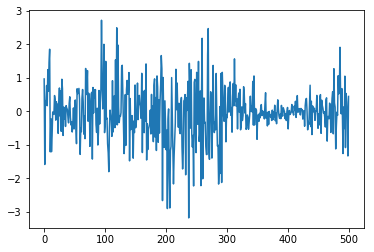

In [305]:
plt.plot(y)
plt.show()

In [306]:
#true values
# -----
ptr=[u,phi,tau]
h0tr=h0
htr=h
vtr=vol
sdtr=sd

In [307]:
theta0=[u,phi]
V0=np.eye(2)*100
nu0=10
s02=(nu0-2)/nu0*tau2
m0=h0
c0=100
M0=1000
M=3000

In [308]:
h0   = h0tr
h    = htr
mu   = ptr[0]
phi  = ptr[1]
tau2 = ptr[2]**2
vh   = 0.1

In [309]:
def svolrw(y,mu,phi,tau2,h0,h,vh):
    eta2=np.hstack((np.ones(n-1)*(tau2/(1+phi**2)),np.array([tau2])))
    eta=np.sqrt(eta2)
    coef1=((1-phi)/(1+phi**2))*mu
    coef2=(phi/(1+phi**2))
    for t in range(n-1):
        if t==n:
            mut=mu+phi*h[t-1]
        elif t==0:
            mut=coef1+coef2*(h[2]+h[0])
        else:
            mut=coef1+coef2*(h[t+1]+h[t-1])
        ht=np.random.normal(h[t],vh,1)[0]
        num=norm.pdf(ht,mut,eta[t])*norm.pdf(y[t],0,np.exp(ht/2))
        den=norm.pdf(h[t],mut,eta[t])*norm.pdf(y[t],0,np.exp(h[t]/2))
        lacc=min(1,num/den)
        if np.random.uniform(0,1,1)[0]<lacc:
            h[t]=ht
    return h

In [310]:
def fixedpar(h,X,theta0,V0,nu0,s02):
    n=len(h)
    k=X.shape[1]
    par1=(nu0+n)/2
    var=(np.matrix(V0)**(-1)+np.matrix(X).T*np.matrix(X))**(-1)
    mean=var*((np.matrix(V0)**(-1))*np.matrix(theta0).T+np.matrix(X).T*np.matrix(h).T)
    par2=nu0*s02+(np.matrix(h).T-np.matrix(X)*mean).T*(np.matrix(h).T-np.matrix(X)*mean)
    par2=(par2+(mean-np.matrix(theta0).T).T*np.matrix(V0)**(-1)*(mean-np.matrix(theta0).T))/2
    sig2=1/np.random.gamma(par1,1/(par2.tolist()[0][0]),1)
    var=var*sig2[0]
    mean=mean+np.linalg.cholesky(var).T*np.matrix(np.random.randn(2)).T
    a=mean.tolist()
    a.append(list(sig2))
    return a

In [311]:
for iter in range(M0+M):
    h=svolrw(y,mu,phi,tau2,h0,h,vh)
    var=1/(1/c0+(phi**2)/tau2)
    mean=var*((1/c0)*m0+phi*(1/tau2)*(h[0]-mu))
    h0=np.random.normal(mean,np.sqrt(var),1)[0]
    X=np.vstack((np.ones(n),np.hstack((h0,h[0:n-1])))).T
    par=fixedpar(h,X,theta0,V0,nu0,s02)
    par=[par[0][0],par[1][0],par[2][0]]
    mu=par[0]
    phi=par[1]
    tau2=par[2]
    ps0=pd.DataFrame(par).T
    hs0=pd.DataFrame(h).T
    if iter==0:
        ps=ps0
        hs=hs0
    else:
        ps=ps.append(ps0)
        hs=hs.append(hs0)
ps.index=np.arange(M0+M)
hs.index=np.arange(M0+M)

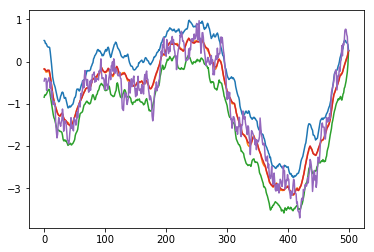

In [312]:
plt.plot(hs[M0+1:M0+M].quantile(0.95))
plt.plot(hs[M0+1:M0+M].quantile(0.5))
plt.plot(hs[M0+1:M0+M].quantile(0.05))
plt.plot(hs[M0+1:M0+M].mean())
plt.plot(pd.DataFrame(htr))
plt.show()

In [313]:
plt.figure(figsize=(20,18))
index=np.arange(0,9,3)
title=['mu','phi','tau2']
for idx in range(len(index)):
    plt.subplot(331+index[idx])
    plt.plot(ps[M0+1:M0+M][idx])
    plt.title(title[idx])
    plt.xlabel('iteration')
    plt.subplot(331+index[idx]+1)
    plt.hist(ps[M0+1:M0+M][idx])
    ax1=plt.subplot(331+index[idx]+2)
    sm.graphics.tsa.plot_acf(ps[M0+1:M0+M][idx],lags=40,ax=ax1)
    plt.xlabel('lag')

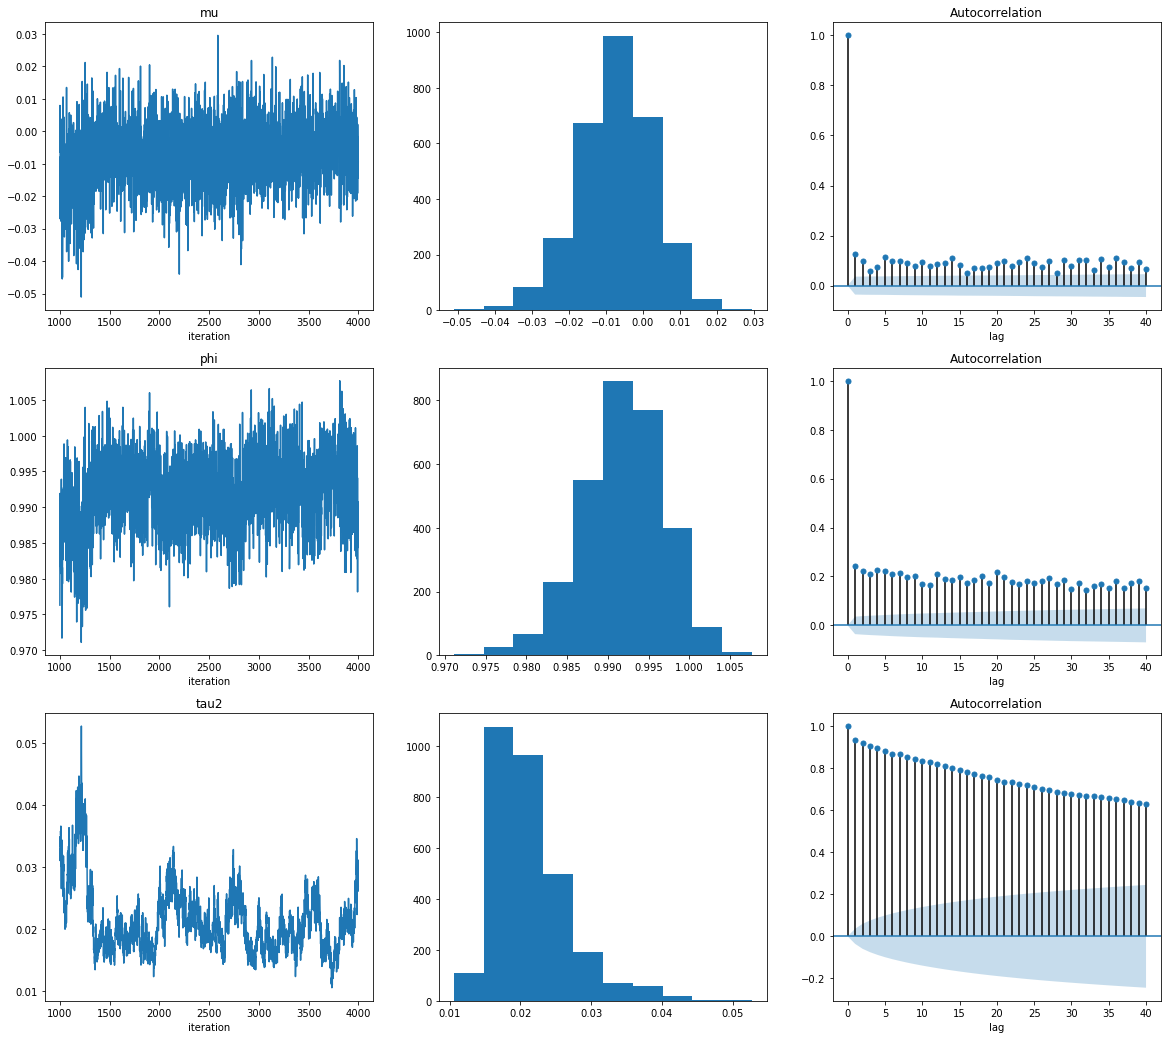

In [314]:
plt.show()

# 独立潜在变量抽样

In [496]:
n=500
h0=0.0
u=-0.00645
phi=0.99
tau2=0.15**2
tau=np.sqrt(tau2)

In [497]:
h=[]
h.append(0)
for i in range(1,n):
    h.append(np.random.normal(u+phi*h[i-1],tau,1)[0])

In [498]:
vol=np.exp(h)
sd=np.sqrt(vol)
y=[]
for i in range(n):
    y.append(np.random.normal(0,1,1)[0]*sd[i])

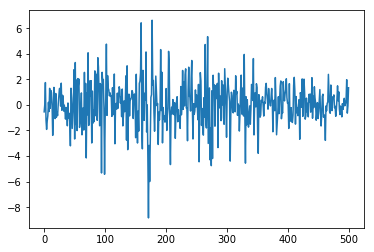

In [499]:
plt.plot(y)
plt.show()

In [500]:
ptr=[u,phi,tau]
h0tr=h0
htr=h
vtr=vol
sdtr=sd

In [501]:
theta0=[u,phi]
V0=np.eye(2)*100
nu0=10
s02=(nu0-2)/nu0*tau2
m0=h0
c0=100
M0=1000
M=3000

In [502]:
h0   = h0tr
h    = htr
mu   = ptr[0]
phi  = ptr[1]
tau2 = ptr[2]**2
vh   = 0.1

In [503]:
def svolsingle(y,mu,phi,tau2,h0,h):
    eta2=np.hstack((np.ones(n-1)*(tau2/(1+phi**2)),np.array([tau2])))
    eta=np.sqrt(eta2)
    coef1=((1-phi)/(1+phi**2))*mu
    coef2=(phi/(1+phi**2))
    for t in range(n-1):
        if t==n:
            mut=mu+phi*h[t-1]
        elif t==0:
            mut=coef1+coef2*(h[2]+h[0])
        else:
            mut=coef1+coef2*(h[t+1]+h[t-1])
        mut1=mut+0.5*eta2[t]*((y[t]**2)*np.exp(-mut)-1)
        ht=np.random.normal(mut1,eta[t],1)[0]
        num=norm.pdf(ht,mut,eta[t])*norm.pdf(y[t],0,np.exp(ht/2))/norm.pdf(ht,mut1,eta[t])
        den=norm.pdf(h[t],mut,eta[t])*norm.pdf(y[t],0,np.exp(h[t]/2))/norm.pdf(h[t],mut1,eta[t])
        lacc=min(1,num/den)
        if np.random.uniform(0,1,1)[0]<lacc:
            h[t]=ht
    return h

In [504]:
for iter in range(M0+M):
    h=svolsingle(y,mu,phi,tau2,h0,h)
    var=1/(1/c0+(phi**2)/tau2)
    mean=var*((1/c0)*m0+phi*(1/tau2)*(h[0]-mu))
    h0=np.random.normal(mean,np.sqrt(var),1)[0]
    X=np.vstack((np.ones(n),np.hstack((h0,h[0:n-1])))).T
    par=fixedpar(h,X,theta0,V0,nu0,s02)
    par=[par[0][0],par[1][0],par[2][0]]
    mu=par[0]
    phi=par[1]
    tau2=par[2]
    ps0=pd.DataFrame(par).T
    hs0=pd.DataFrame(h).T
    if iter==0:
        ps=ps0
        hs=hs0
    else:
        ps=ps.append(ps0)
        hs=hs.append(hs0)
ps.index=np.arange(M0+M)
hs.index=np.arange(M0+M)

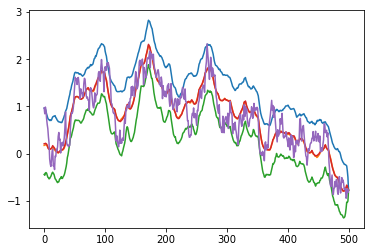

In [505]:
plt.plot(hs[M0+1:M0+M].quantile(0.95))
plt.plot(hs[M0+1:M0+M].quantile(0.5))
plt.plot(hs[M0+1:M0+M].quantile(0.05))
plt.plot(hs[M0+1:M0+M].mean())
plt.plot(pd.DataFrame(htr))
plt.show()

In [506]:
plt.figure(figsize=(20,18))
index=np.arange(0,9,3)
title=['mu','phi','tau2']
for idx in range(len(index)):
    plt.subplot(331+index[idx])
    plt.plot(ps[M0+1:M0+M][idx])
    plt.title(title[idx])
    plt.xlabel('iteration')
    plt.subplot(331+index[idx]+1)
    plt.hist(ps[M0+1:M0+M][idx])
    ax1=plt.subplot(331+index[idx]+2)
    sm.graphics.tsa.plot_acf(ps[M0+1:M0+M][idx],lags=40,ax=ax1)
    plt.xlabel('lag')

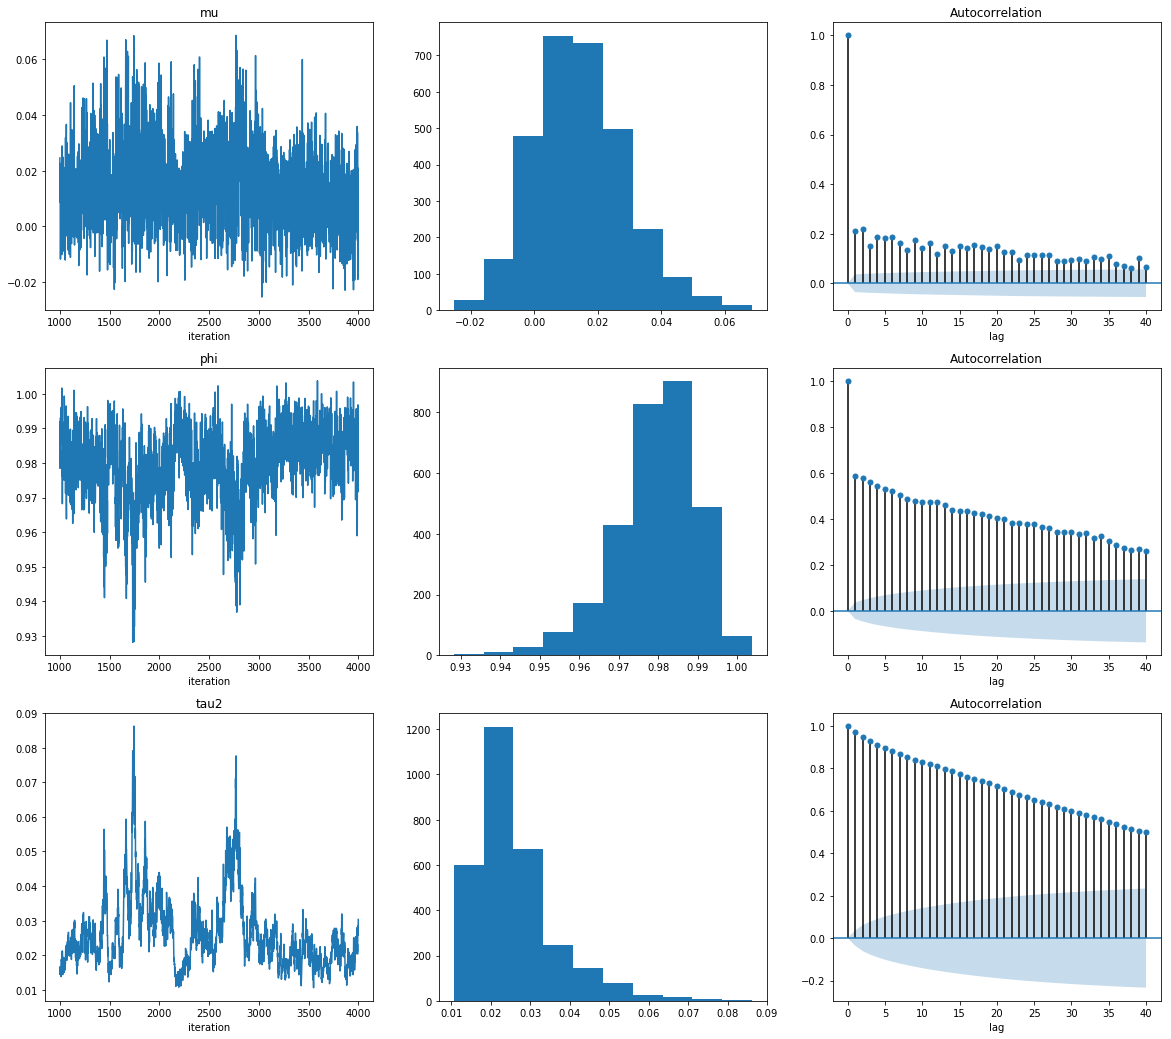

In [507]:
plt.show()

# FFBS 卡尔曼滤波平滑

In [715]:
n=500
h0=0.0
u=-0.00645
phi=0.99
tau2=0.15**2
tau=np.sqrt(tau2)

In [716]:
h=[]
h.append(0)
for i in range(1,n):
    h.append(np.random.normal(u+phi*h[i-1],tau,1)[0])

In [717]:
hhh=h

In [718]:
vol=np.exp(h)
sd=np.sqrt(vol)
y=[]
for i in range(n):
    y.append(np.random.normal(0,1,1)[0]*sd[i])

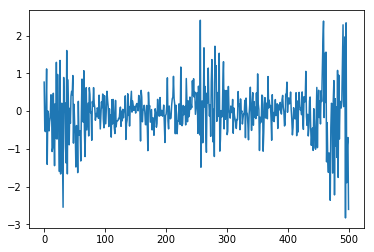

In [719]:
plt.plot(y)
plt.show()

In [720]:
y1=np.log(np.array(y)**2)+1.27
sig2=(np.pi**2)/2

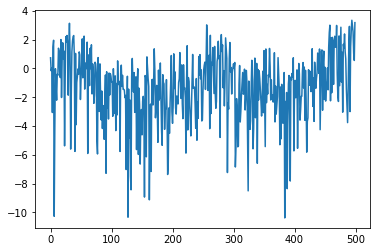

In [721]:
plt.plot(y1)
plt.show()

In [722]:
y1=list(y1)

In [723]:
h0   = h0tr
h    = htr
mu   = ptr[0]
phi  = ptr[1]
tau2 = ptr[2]**2
vh   = 0.1

In [910]:
def ffbsu(y,F,alpha,V,gamma,G,W,m0,c0):
    if isinstance(F,float):
        F=np.ones(n)*F
    if isinstance(alpha,float):
        alpha=np.ones(n)*alpha
    if isinstance(V,float):
        V=np.ones(n)*V
    a=np.zeros(n)
    R=np.zeros(n)
    m=np.zeros(n)
    c=np.zeros(n)
    B=np.zeros(n-1)
    H=np.zeros(n-1)
    a[0]=gamma+G*m0
    R[0]=G**2*c0+W
    f=alpha[0]+F[0]*a[0]
    Q=R[0]*F[0]**2+V[0]
    A=R[0]*F[0]/Q
    m[0]=a[0]+A*(y[0]-f)
    c[0]=R[0]-Q*A**2
    #forwaid filtering
    for t in range(1,n):
        a[t]=gamma+G*m[t-1]
        R[t]=(G**2)*c[t-1]+W
        f=alpha[t]+F[t]*a[t]
        Q=R[t]*F[t]**2+V[t]
        A=R[t]*F[t]/Q
        m[t]=a[t]+A*(y[t]-f)
        c[t]=R[t]-Q*A**2
        B[t-1]=c[t-1]*G/R[t]
        H[t-1]=np.sqrt(c[t-1]-R[t]*(B[t-1]**2))
    theta=np.zeros(n)
    theta[n-1]=np.random.normal(m[n-1],np.sqrt(c[n-1]))
    for t in range(n-1)[::-1]:
        theta[t]=np.random.normal(m[t]+B[t]*(theta[t+1]-a[t+1]),H[t],1)[0]
    return list(theta)

In [725]:
for iter in range(M0+M):
    h=ffbsu(y1,1.0,0.0,sig2,mu,phi,tau2,m0,c0)
    var=1/(1/c0+(phi**2)/tau2)
    mean=var*((1/c0)*m0+phi*(1/tau2)*(h[0]-mu))
    h0=np.random.normal(mean,np.sqrt(var),1)[0]
    X=np.vstack((np.ones(n),np.hstack((h0,h[0:n-1])))).T
    par=fixedpar(h,X,theta0,V0,nu0,s02)
    par=[par[0][0],par[1][0],par[2][0]]
    mu=par[0]
    phi=par[1]
    tau2=par[2]
    ps0=pd.DataFrame(par).T
    hs0=pd.DataFrame(h).T
    if iter==0:
        ps=ps0
        hs=hs0
    else:
        ps=ps.append(ps0)
        hs=hs.append(hs0)
ps.index=np.arange(M0+M)
hs.index=np.arange(M0+M)

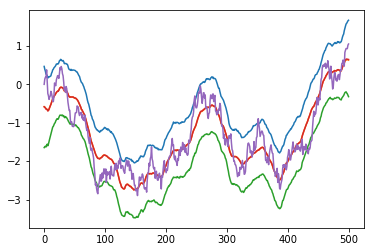

In [726]:
plt.plot(hs[M0+1:M0+M].quantile(0.95))
plt.plot(hs[M0+1:M0+M].quantile(0.5))
plt.plot(hs[M0+1:M0+M].quantile(0.05))
plt.plot(hs[M0+1:M0+M].mean())
plt.plot(pd.DataFrame(hhh))
plt.show()

In [727]:
plt.figure(figsize=(20,18))
index=np.arange(0,9,3)
title=['mu','phi','tau2']
for idx in range(len(index)):
    plt.subplot(331+index[idx])
    plt.plot(ps[M0+1:M0+M][idx])
    plt.title(title[idx])
    plt.xlabel('iteration')
    plt.subplot(331+index[idx]+1)
    plt.hist(ps[M0+1:M0+M][idx])
    ax1=plt.subplot(331+index[idx]+2)
    sm.graphics.tsa.plot_acf(ps[M0+1:M0+M][idx],lags=40,ax=ax1)
    plt.xlabel('lag')

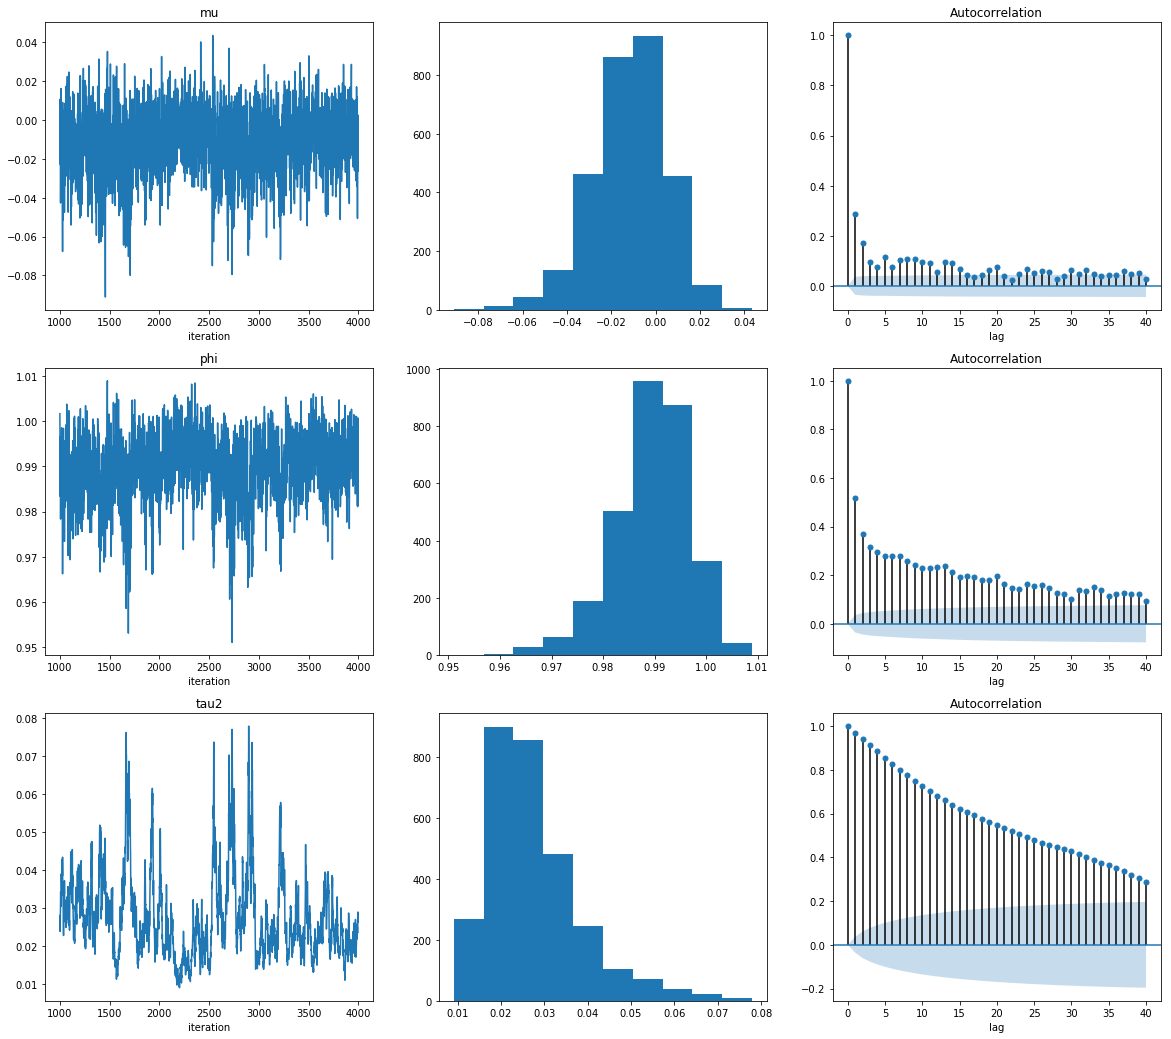

In [728]:
plt.show()

In [ ]:
np.random.choice(5, 3, p=[0.1, 0, 0.3, 0.6, 0])

# 混合状态分布的 卡尔曼滤波抽样

In [945]:
n=500
h0=0.0
u=-0.00645
phi=0.99
tau2=0.15**2
tau=np.sqrt(tau2)

In [946]:
h=[]
h.append(0)
for i in range(1,n):
    h.append(np.random.normal(u+phi*h[i-1],tau,1)[0])
hhh=h

In [947]:
vol=np.exp(h)
sd=np.sqrt(vol)
y=[]
for i in range(n):
    y.append(np.random.normal(0,1,1)[0]*sd[i])

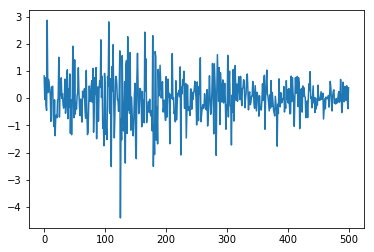

In [948]:
plt.plot(y)
plt.show()

In [949]:
y1=np.log(np.array(y)**2)

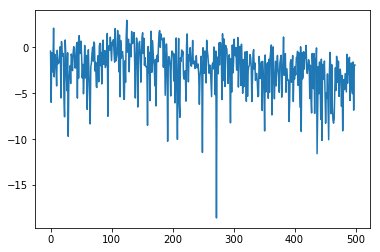

In [950]:
plt.plot(y1)
plt.show()

In [951]:
h0   = h0tr
h    = htr
mu   = ptr[0]
phi  = ptr[1]
tau2 = ptr[2]**2
vh   = 0.1

In [952]:
def ncind(yh):
    mu=[-11.40039,-5.24321,-9.83726,1.50746,-0.65098,0.52478,-2.35859]
    sig2=[5.795960,2.613690,5.179500,0.167350,0.640090,0.340230,1.262610]
    q=[0.007300,0.105560,0.000020,0.043950,0.340010,0.245660,0.257500]
    sig=np.sqrt(sig2)
    w=norm.pdf(yh,mu,sig)*q
    return np.random.choice(np.arange(7), 1, p=list(w/np.sum(w)))[0]

In [953]:
def svu(y1,h,gamma,G,W,m0,c0):
    mu=[-11.40039,-5.24321,-9.83726,1.50746,-0.65098,0.52478,-2.35859]
    sig2=[5.795960,2.613690,5.179500,0.167350,0.640090,0.340230,1.262610]
    q=[0.007300,0.105560,0.000020,0.043950,0.340010,0.245660,0.257500]
    sig=np.sqrt(sig2)
    z=list(map(ncind,y1-h))
    muu=np.array(list(map(lambda x:mu[x],z)))
    sigg=np.array(list(map(lambda x:sig2[x],z)))
    return ffbsu(y1,1.0,muu,sigg,gamma,G,W,m0,c0)

In [954]:
for iter in range(M0+M):
    h=svu(y1,h,mu,phi,tau2,m0,c0)
    var=1/(1/c0+(phi**2)/tau2)
    mean=var*((1/c0)*m0+phi*(1/tau2)*(h[0]-mu))
    h0=np.random.normal(mean,np.sqrt(var),1)[0]
    X=np.vstack((np.ones(n),np.hstack((h0,h[0:n-1])))).T
    par=fixedpar(h,X,theta0,V0,nu0,s02)
    par=[par[0][0],par[1][0],par[2][0]]
    mu=par[0]
    phi=par[1]
    tau2=par[2]
    ps0=pd.DataFrame(par).T
    hs0=pd.DataFrame(h).T
    if iter==0:
        ps=ps0
        hs=hs0
    else:
        ps=ps.append(ps0)
        hs=hs.append(hs0)
ps.index=np.arange(M0+M)
hs.index=np.arange(M0+M)

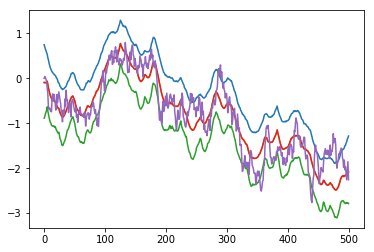

In [955]:
plt.plot(hs.quantile(0.95))
plt.plot(hs.quantile(0.5))
plt.plot(hs.quantile(0.05))
plt.plot(hs.mean())
plt.plot(pd.DataFrame(hhh))
plt.show()

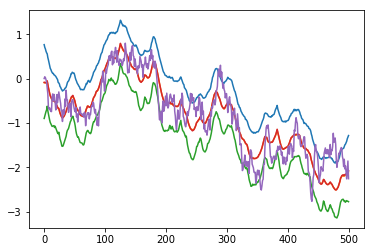

In [956]:
plt.plot(hs[M0+1:M0+M].quantile(0.95))
plt.plot(hs[M0+1:M0+M].quantile(0.5))
plt.plot(hs[M0+1:M0+M].quantile(0.05))
plt.plot(hs[M0+1:M0+M].mean())
plt.plot(pd.DataFrame(hhh))
plt.show()

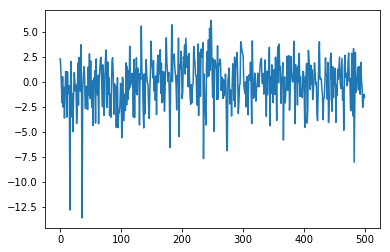

In [939]:
plt.show()